In [1]:
from data import train_df, test_df
import numpy as np
import pandas as pd

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Child          891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [ ]:
train_df.describe()

*Remover entradas que possuem NaN reduz bastante o tamanho do dataset*

In [ ]:
train_df.dropna().describe()

## Análise inicial

In [ ]:
# pra ver quantas pessoas sobreviveram
train_df["Survived"].value_counts()

In [ ]:
# pra ver os percentuais de quem sobreviveu
train_df["Survived"].value_counts(normalize = True)

In [ ]:
# quantos homens sobreviveram
train_df["Survived"][train_df["Sex"] == 'male'].value_counts(normalize=True)

In [ ]:
# quantas mulheres sobreviveram
train_df["Survived"][train_df["Sex"] == 'female'].value_counts(normalize=True)

Proporcionalmente, um número maior de mulheres sobreviveram. Seria por causa da política de "mulheres e crianças primeiro"?

In [ ]:
# Existe o campo "Child"?
train_df.info()

In [2]:
# Completando os valores em branco para a mediana da feature "Age"
train_df['Age'] = train_df["Age"].fillna(train_df["Age"].median())
train_df["Child"] = 0
children = train_df["Age"] < 18
train_df.loc[children, "Child"] = 1
train_df["Survived"][train_df["Child"] == 0].value_counts(normalize=True)

0    0.638817
1    0.361183
Name: Survived, dtype: float64

In [3]:
# A feature 'Sex' precisa ser mapeada para inteiros
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

In [25]:
# Vamos usar então as features 'Sex' e 'Child' para uma classificacao inicial
from sklearn import tree

# Separando o resultado e as features usadas
target = train_df['Survived'].values
initial_features = train_df[['Sex', 'Child']].values

# Da classifier
my_tree_one = tree.DecisionTreeClassifier().fit(initial_features, target)

# Look at the importance of the included features and print the score
print(my_tree_one.feature_importances_)
print(my_tree_one.score(initial_features, target))

[ 0.95466315  0.04533685]
0.786756453423


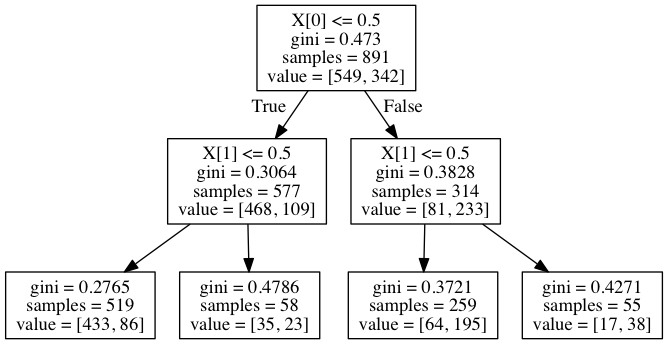

In [5]:
import pydotplus as pydot
from sklearn.externals.six import StringIO
from IPython.display import Image 
dotfile = StringIO()
tree.export_graphviz(my_tree_one, out_file=dotfile)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

A árvore de decisão funciona aplicando as decisões de cada nível ao exemplo passado como entrada. Ao se chegar a uma folha, a árvore checa o que aconteceu com a maioria dos exemplos que possuem aquelas características: se a maioria tiver sobrevivido, a árvore decide que o novo exemplo também deve ter sobrevivido.

In [38]:
# Por exemplo, existem 55 crianças do sexo feminino no conjunto de treinamento. A maioria delas sobreviveram,
# o que pode ser visto na filtragem abaixo...
temp = train_df[train_df['Child'] == 1]
female_children = temp[temp['Sex'] == 1]
female_children.groupby('Survived').describe()

Age  Child        Fare      Parch  PassengerId  \
Survived                                                               
0        count  17.000000   17.0   17.000000  17.000000    17.000000   
         mean    8.441176    1.0   31.911765   1.411765   349.176471   
         std     5.061751    0.0   32.402672   0.795206   278.293064   
         min     2.000000    1.0    7.854200   0.000000    15.000000   
         25%     3.000000    1.0   15.245800   1.000000   115.000000   
         50%     9.000000    1.0   27.900000   2.000000   298.000000   
         75%    11.000000    1.0   31.275000   2.000000   543.000000   
         max    17.000000    1.0  151.550000   2.000000   853.000000   
1        count  38.000000   38.0   38.000000  38.000000    38.000000   
         mean    9.592105    1.0   33.172261   0.868421   416.342105   
         std     6.159595    0.0   39.725627   0.777072   279.844482   
         min     0.750000    1.0    7.225000   0.000000    10.000000   
         25%     4.000000    1.0   12.071875   0.000000   176.000000   
         50%    10.500000    1.0   19.379150   1.000000   441.500000   
         75%    15.750000    1.0   32.596875   1.000000   678.750000   
         max    17.000000    1.0  211.337500   2.000000   876.000000   

                   Pclass   Sex      SibSp  
Survived                                    
0        count  17.000000  17.0  17.000000  
         mean    2.882353   1.0   2.235294  
         std     0.485071   0.0   1.714986  
         min     1.000000   1.0   0.000000  
         25%     3.000000   1.0   1.000000  
         50%     3.000000   1.0   3.000000  
         75%     3.000000   1.0   4.000000  
         max     3.000000   1.0   5.000000  
1        count  38.000000  38.0  38.000000  
         mean    2.315789   1.0   0.736842  
         std     0.774780   0.0   1.031509  
         min     1.000000   1.0   0.000000  
         25%     2.000000   1.0   0.000000  
         50%     2.500000   1.0   0.000000  
         75%     3.000000   1.0   1.000000  
         max     3.000000   1.0   4.000000

In [48]:
# ...Logo, ao se passar para a árvore um exemplo consistindo de uma
# criança do sexo feminino, a árvore decidirá que ela deve ter sobrevivido.
new_female_child = pd.DataFrame(data=[[1, 1]], columns=['Gender', 'Child'])
prediction = my_tree_one.predict(new_female_child)
print(prediction)

[1]


In [51]:
SURVIVED = 1
DIED = 0

In [52]:
if (prediction[0] == SURVIVED):
    print('Survived :D')
else:
    print('Died :(')

Survived :D


In [66]:
cabin_fare_df = train_df.ix[:, ['Cabin', 'Fare']]

In [69]:
encoding = {}
for i, cabin in enumerate(cabin_fare_df['Cabin'].unique()):
    encoding[cabin] = i

In [70]:
encoding

{nan: 0,
 'D26': 20,
 'C45': 123,
 'F4': 33,
 'D9': 107,
 'T': 67,
 'D15': 39,
 'C30': 86,
 'E8': 124,
 'E24': 121,
 'B57 B59 B63 B66': 59,
 'C95': 92,
 'A14': 84,
 'D47': 25,
 'D10 D12': 19,
 'C85': 1,
 'E25': 89,
 'C87': 43,
 'C99': 48,
 'C103': 5,
 'A20': 104,
 'B20': 118,
 'E77': 131,
 'C83': 14,
 'E17': 143,
 'G6': 4,
 'B28': 13,
 'B96 B98': 73,
 'C47': 141,
 'E31': 17,
 'B49': 52,
 'D30': 128,
 'B42': 146,
 'C78': 41,
 'C65': 56,
 'D37': 69,
 'C7': 60,
 'B58 B60': 22,
 'B38': 93,
 'D6': 134,
 'F G73': 16,
 'C62 C64': 120,
 'C54': 58,
 'A24': 144,
 'B22': 95,
 'C93': 40,
 'D48': 111,
 'D56': 6,
 'C123': 2,
 'C23 C25 C27': 8,
 'E46': 3,
 'B39': 94,
 'B79': 88,
 'C82': 72,
 'F38': 132,
 'E68': 102,
 'B78': 9,
 'C46': 127,
 'C32': 62,
 'C126': 113,
 'B19': 30,
 'D20': 87,
 'A10': 101,
 'D11': 130,
 'E121': 129,
 'C128': 68,
 'C49': 32,
 'E33': 29,
 'D28': 142,
 'E38': 80,
 'B51 B53 B55': 115,
 'E67': 45,
 'D46': 90,
 'D49': 116,
 'B4': 35,
 'E49': 140,
 'C101': 99,
 'A5': 18,
 'B41':